# PRACTICA 11 - RBF y SVM

## Andrés Cabero Mata

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

### Carga y normalización de datos

In [2]:
data = load_breast_cancer()

In [3]:
#Normalización de los datos
X = MinMaxScaler().fit_transform(data.data)
y = data.target

In [4]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [5]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


### Mejor numero de neuronas de la capa oculta

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [7]:
CAPAS = 10
iRANGO = 2
fRANGO = 31
RANGO = range(iRANGO, fRANGO)

In [8]:
acierto = [0 for _ in RANGO]

#K = a la cantidad de neuronas
for k in RANGO:
    skf = StratifiedKFold(n_splits=CAPAS, random_state=0)
    skf = skf.split(X, y)
    
    kmeans = KMeans(n_clusters=k, random_state=0)

#Para cada k hacemos CV de los dato
    for train_index, test_index in skf:
        
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        
        
#Se entrena el modelo y se calcula la prediccion del conjunto de test
        kmeans.fit(X_train)
        predCluster = kmeans.predict(X_test)
        clusters = kmeans.labels_

#Moda de cada cluster calculada utilzando la funcion de scipy.mode
        moda = -1 * np.ones(k, dtype='int')
        for i in range(k):
            moda[i] = mode(y_train[np.argwhere(clusters==i)])[0].astype(int)
    
#Se establece la prediccion hecha por el modelo al conjunto de test
        pred = moda[predCluster]     

#Sumamos el porcentaje de acierto para cada capa
        acierto[k-iRANGO] += accuracy_score(y_test, pred) / CAPAS


In [9]:
df = pd.DataFrame()
df["Neuronas"] = [i for i in RANGO]
df["Acierto"] = acierto
df.style.hide_index()

Neuronas,Acierto
2,0.926459
3,0.905157
4,0.880373
5,0.917531
6,0.88601
7,0.898076
8,0.912237
9,0.915625
10,0.92966
11,0.927782


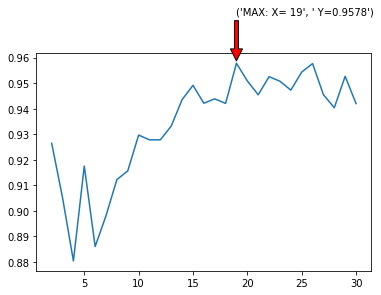

In [10]:
plt_x = [i for i in RANGO]
plt_y = acierto
plt_x_max=np.argmax(acierto)+iRANGO
plt_y_max=acierto[np.argmax(acierto)]
plt.plot(plt_x, plt_y)
plt_max_name='MAX: X= %i' % plt_x_max, " Y=%.4f" % plt_y_max
plt.annotate(plt_max_name,  xy=(plt_x_max,plt_y_max), xytext=(plt_x_max,plt_y_max+plt_y_max/50),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

In [11]:
mejorCluster = np.argmax(acierto)+iRANGO

In [12]:
print("Mejor cantidad de clusters: ", mejorCluster)

Mejor cantidad de clusters:  19


### Entrenamiento y predicción de la capa de salida

In [13]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.svm import SVC

In [14]:
iDGR = 1
fDGR = 6
CAPAS = 10
DGR = range(iDGR, fDGR)

In [15]:
acierto = [0 for i in DGR]

#d = número de grados del SVC
for d in DGR:
    skf = StratifiedKFold(n_splits=CAPAS, random_state=0)
    skf = skf.split(X, y)

#Se hace cross-validation para cada número de grados del SVC
    for train_index, test_index in skf:

        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

#Buscamos los centros con el número de mejor neuronas antes obtenido
        kmeans = KMeans(n_clusters=mejorCluster, random_state=0)
        kmeans.fit(X_train)

        centers = kmeans.cluster_centers_

#Cálculo de la distancia y el sigma necesarios para la salida del hidden layer.
        distance = euclidean_distances(centers)
        sigma = np.sum(distance, axis=0)/(centers.shape[0]-1)

#Salidas del hidden layer para el conjunto de entrenamiento
        f_tr = np.zeros((X_train.shape[0], centers.shape[0]), dtype=float)
        for i in range(X_train.shape[0]):
            for j in range(centers.shape[0]):
                f_tr[i][j] = np.exp(-np.sum((X_train[i]-centers[j])**2)/(2.0*(sigma[j]**2)))

#Salidas del hidden layer para el conjunto de test
        f_ts = np.zeros((X_test.shape[0], centers.shape[0]), dtype=float)
        for i in range(X_test.shape[0]):
            for j in range(centers.shape[0]):
                f_ts[i][j] = np.exp(-np.sum((X_test[i]-centers[j])**2)/(2.0*(sigma[j]**2)))

#Fit del conjunto de entrenamiento y predict del test
        svc = SVC(kernel="poly", degree=d, gamma="auto", random_state=0)

        svc.fit(f_tr, y_train)

        pred = svc.predict(f_ts)

        acierto[d -iDGR] += accuracy_score(y_test, pred) / CAPAS

In [16]:
df = pd.DataFrame()
df["Grados"] = [i for i in DGR]
df["Acierto"] = acierto
df.style.hide_index()

Grados,Acierto
1,0.944005
2,0.938741
3,0.933508
4,0.928244
5,0.914239


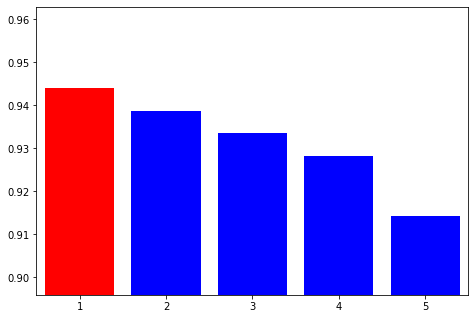

In [17]:
plt_max = np.max(acierto)
plt_min = np.min(acierto)
fig = plt.figure()
fig_ax = fig.add_axes([0,0,1,1])
fig_x = [i for i in DGR]
fig_y = acierto
fig_ax.bar(fig_x, fig_y, color=["r" if np.argmax(acierto)==i-1 else "b" for i in DGR])
plt.axis(([iDGR-0.5, fDGR-0.5,plt_min-plt_min/50, plt_max+plt_max/50]))
plt.show()

In [18]:
print("Mejor grado: ", np.argmax(acierto)+1)
print("Numero de neuronas de la capa oculta: ", mejorCluster)
print("Mejor porcentaje de aciertos: %.6f" % acierto[np.argmax(acierto)])

Mejor grado:  1
Numero de neuronas de la capa oculta:  19
Mejor porcentaje de aciertos: 0.944005
